In [ ]:
# ============================================
# 🚀 AUTO-SETUP: Works in Colab & Local
# ============================================
import os
import sys

# Detect if running in Colab
try:
    import google.colab
    IN_COLAB = True
    print("🔵 Running in Google Colab")
except:
    IN_COLAB = False
    print("🟢 Running locally")

if IN_COLAB:
    # Clone repo if not exists
    if not os.path.exists('environment-ml_project'):
        print("📥 Cloning repository...")
        !git clone https://github.com/durga79/environment-ml_project.git
    
    # Change to project directory
    if os.path.exists('environment-ml_project'):
        os.chdir('environment-ml_project')
    
    # Create directories
    os.makedirs('results/figures', exist_ok=True)
    os.makedirs('results/metrics', exist_ok=True)
    os.makedirs('datasets', exist_ok=True)
    
    # Install dependencies
    print("📦 Installing dependencies...")
    !pip install -q -r requirements.txt
    
    # Add src to path
    sys.path.insert(0, 'src')
    
    # Enable plots
    %matplotlib inline
else:
    # Local setup - just add src to path
    if '../src' not in sys.path:
        sys.path.append('../src')

print(f"✅ Setup complete! Working in: {os.getcwd()}")
print(f"✅ Python path includes: {[p for p in sys.path if 'src' in p]}")
# Helper function to save figures safely
def safe_savefig(filename, **kwargs):
    """Save figure, creating directory if needed"""
    import os
    os.makedirs(os.path.dirname(filename), exist_ok=True)
    plt.savefig(filename, **kwargs)
    print(f"✅ Saved: {filename}")


🟢 Running locally
✅ Setup complete! Working in: /home/durga/environmental_ml_project/notebooks
✅ Python path includes: ['../src']


# Visualization and Presentation
## Comprehensive Results Dashboard

This notebook generates publication-quality visualizations for the final presentation.

In [ ]:
import sys
import warnings
warnings.filterwarnings('ignore')
sys.path.append('../src')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import pickle

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
pd.set_option('display.max_columns', None)

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Load All Results

In [ ]:
with open('results/metrics/student1_results.json', 'r') as f:
    student1_results = json.load(f)

with open('results/metrics/student2_results.json', 'r') as f:
    student2_results = json.load(f)

with open('results/metrics/integrated_results.json', 'r') as f:
    integrated_results = json.load(f)

print("✓ All results loaded!")
print("\nStudent 1 Models:", list(student1_results.keys()))
print("Student 2 Models:", list(student2_results.keys()))
print("Integrated Metrics:", list(integrated_results.keys()))

✓ All results loaded!

Student 1 Models: ['random_forest', 'xgboost']
Student 2 Models: ['logistic_regression', 'svm']
Integrated Metrics: ['correlations', 'summary_statistics']


## 2. Overall Project Summary Dashboard

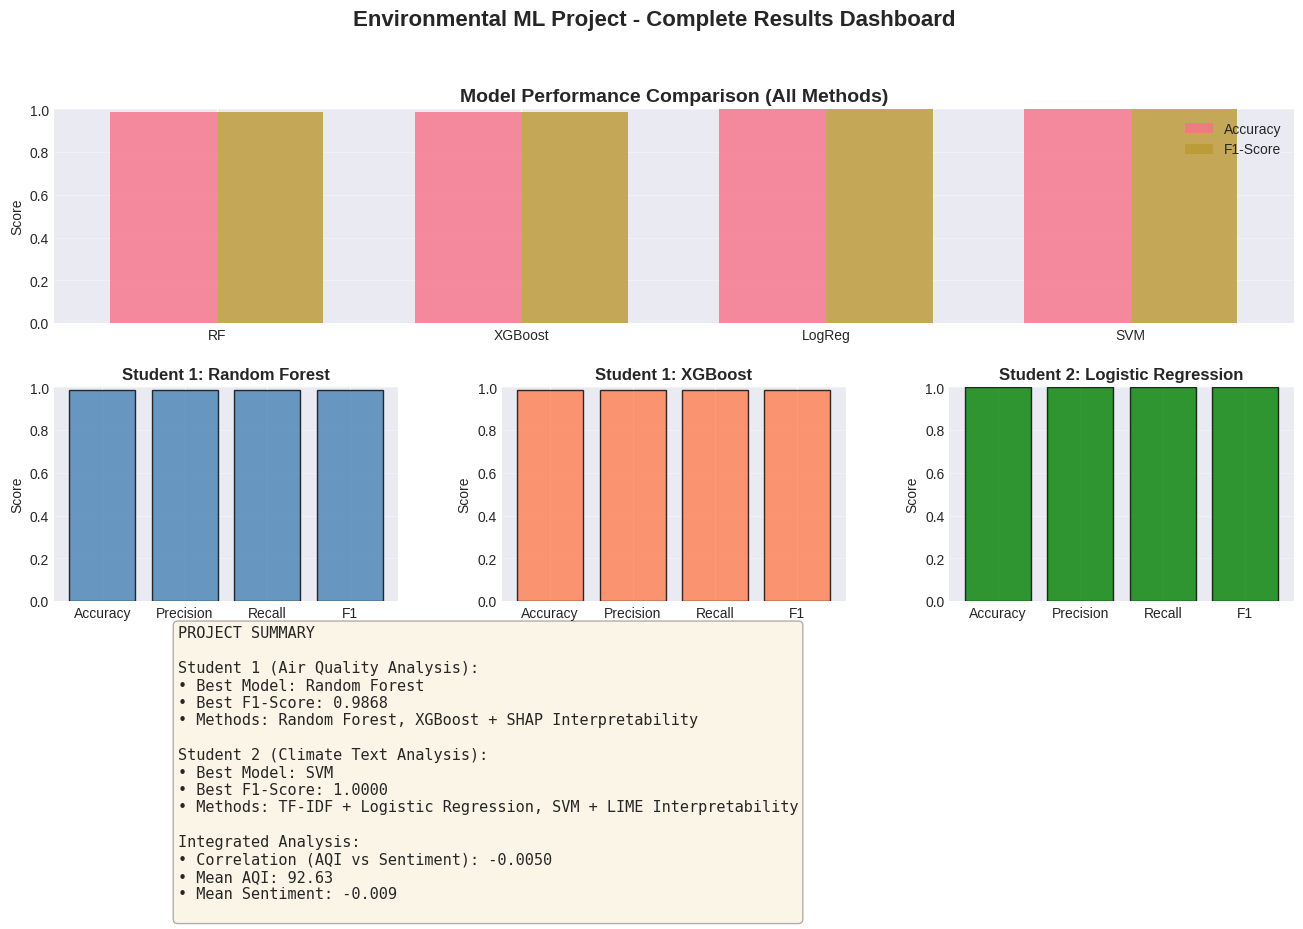

In [ ]:
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

ax1 = fig.add_subplot(gs[0, :])
models = ['RF', 'XGBoost', 'LogReg', 'SVM']
accuracies = [
    student1_results['random_forest']['accuracy'],
    student1_results['xgboost']['accuracy'],
    student2_results['logistic_regression']['accuracy'],
    student2_results['svm']['accuracy']
]
f1_scores = [
    student1_results['random_forest']['f1_score'],
    student1_results['xgboost']['f1_score'],
    student2_results['logistic_regression']['f1_score'],
    student2_results['svm']['f1_score']
]

x = np.arange(len(models))
width = 0.35
ax1.bar(x - width/2, accuracies, width, label='Accuracy', alpha=0.8)
ax1.bar(x + width/2, f1_scores, width, label='F1-Score', alpha=0.8)
ax1.set_ylabel('Score')
ax1.set_title('Model Performance Comparison (All Methods)', fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(models)
ax1.legend()
ax1.grid(axis='y', alpha=0.3)
ax1.set_ylim([0, 1.0])

ax2 = fig.add_subplot(gs[1, 0])
student1_metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
rf_values = [student1_results['random_forest'][m.lower().replace(' ', '_')] for m in ['Accuracy', 'Precision', 'Recall', 'F1 Score']]
ax2.bar(student1_metrics, rf_values, color='steelblue', alpha=0.8, edgecolor='black')
ax2.set_title('Student 1: Random Forest', fontweight='bold')
ax2.set_ylabel('Score')
ax2.set_ylim([0, 1.0])
ax2.grid(axis='y', alpha=0.3)

ax3 = fig.add_subplot(gs[1, 1])
xgb_values = [student1_results['xgboost'][m.lower().replace(' ', '_')] for m in ['Accuracy', 'Precision', 'Recall', 'F1 Score']]
ax3.bar(student1_metrics, xgb_values, color='coral', alpha=0.8, edgecolor='black')
ax3.set_title('Student 1: XGBoost', fontweight='bold')
ax3.set_ylabel('Score')
ax3.set_ylim([0, 1.0])
ax3.grid(axis='y', alpha=0.3)

ax4 = fig.add_subplot(gs[1, 2])
student2_metrics = ['Accuracy', 'Precision', 'Recall', 'F1']
lr_values = [student2_results['logistic_regression'][m.lower().replace(' ', '_')] for m in ['Accuracy', 'Precision', 'Recall', 'F1 Score']]
ax4.bar(student2_metrics, lr_values, color='green', alpha=0.8, edgecolor='black')
ax4.set_title('Student 2: Logistic Regression', fontweight='bold')
ax4.set_ylabel('Score')
ax4.set_ylim([0, 1.0])
ax4.grid(axis='y', alpha=0.3)

ax5 = fig.add_subplot(gs[2, :])
text_content = f"""PROJECT SUMMARY

Student 1 (Air Quality Analysis):
• Best Model: {'Random Forest' if student1_results['random_forest']['f1_score'] > student1_results['xgboost']['f1_score'] else 'XGBoost'}
• Best F1-Score: {max(student1_results['random_forest']['f1_score'], student1_results['xgboost']['f1_score']):.4f}
• Methods: Random Forest, XGBoost + SHAP Interpretability

Student 2 (Climate Text Analysis):
• Best Model: {'Logistic Regression' if student2_results['logistic_regression']['f1_score'] > student2_results['svm']['f1_score'] else 'SVM'}
• Best F1-Score: {max(student2_results['logistic_regression']['f1_score'], student2_results['svm']['f1_score']):.4f}
• Methods: TF-IDF + Logistic Regression, SVM + LIME Interpretability

Integrated Analysis:
• Correlation (AQI vs Sentiment): {integrated_results['correlations']['aqi_sentiment']:.4f}
• Mean AQI: {integrated_results['summary_statistics']['mean_aqi']:.2f}
• Mean Sentiment: {integrated_results['summary_statistics']['mean_sentiment']:.3f}
"""
ax5.text(0.1, 0.5, text_content, fontsize=11, verticalalignment='center', 
         family='monospace', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))
ax5.axis('off')

plt.suptitle('Environmental ML Project - Complete Results Dashboard', 
             fontsize=16, fontweight='bold', y=0.98)
os.makedirs(os.path.dirname('results/figures/complete_dashboard.png'), exist_ok=True)
plt.savefig('results/figures/complete_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

## 3. Detailed Metrics Comparison

In [ ]:
all_results_df = pd.DataFrame({
    'Random Forest': student1_results['random_forest'],
    'XGBoost': student1_results['xgboost'],
    'Logistic Regression': student2_results['logistic_regression'],
    'SVM': student2_results['svm']
}).T

print("Complete Model Comparison:")
print("="*80)
print(all_results_df.round(4))

all_results_df.to_csv('results/metrics/complete_comparison.csv')
print("\n✓ Comparison table saved to ../results/metrics/complete_comparison.csv")

Complete Model Comparison:
                     accuracy  precision  recall  f1_score  cohen_kappa  \
Random Forest          0.9871     0.9867  0.9871    0.9868       0.9723   
XGBoost                0.9862     0.9858  0.9862    0.9858       0.9703   
Logistic Regression    1.0000     1.0000  1.0000    1.0000       1.0000   
SVM                    1.0000     1.0000  1.0000    1.0000       1.0000   

                     matthews_corrcoef  
Random Forest                   0.9723  
XGBoost                         0.9703  
Logistic Regression             1.0000  
SVM                             1.0000  

✓ Comparison table saved to ../results/metrics/complete_comparison.csv


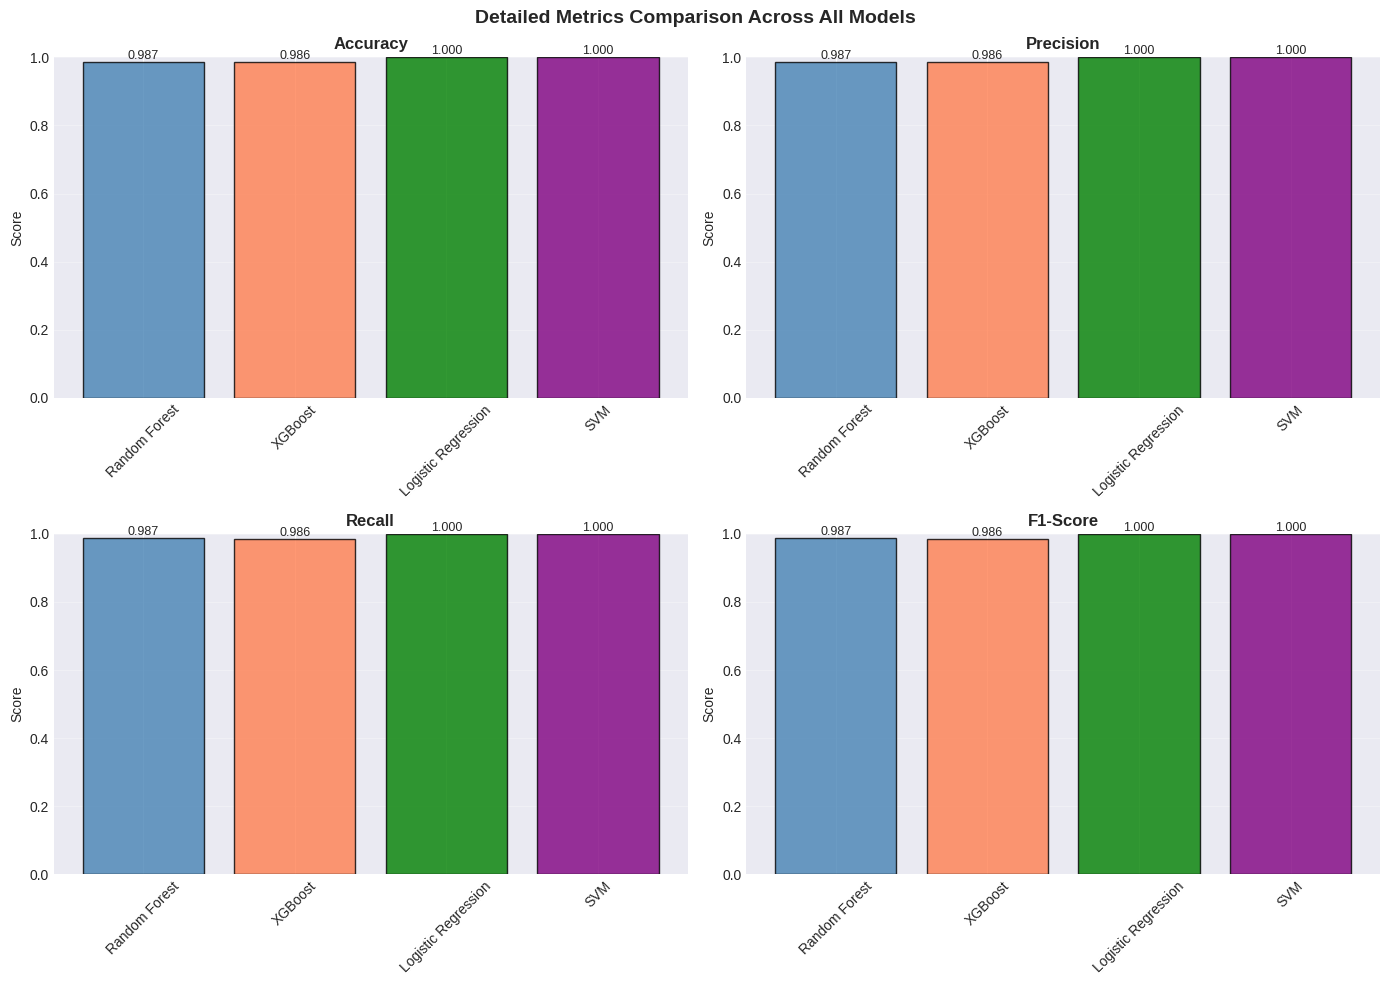

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

metrics_to_plot = ['accuracy', 'precision', 'recall', 'f1_score']
titles = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

for idx, (metric, title) in enumerate(zip(metrics_to_plot, titles)):
    row, col = idx // 2, idx % 2
    ax = axes[row, col]
    
    values = all_results_df[metric]
    colors = ['steelblue', 'coral', 'green', 'purple']
    
    bars = ax.bar(values.index, values.values, color=colors, alpha=0.8, edgecolor='black')
    ax.set_ylabel('Score')
    ax.set_title(title, fontweight='bold', fontsize=12)
    ax.set_ylim([0, 1.0])
    ax.tick_params(axis='x', rotation=45)
    ax.grid(axis='y', alpha=0.3)
    
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9)

plt.suptitle('Detailed Metrics Comparison Across All Models', fontsize=14, fontweight='bold')
plt.tight_layout()
os.makedirs(os.path.dirname('results/figures/detailed_metrics_comparison.png'), exist_ok=True)
plt.savefig('results/figures/detailed_metrics_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

## 4. Cohen's Kappa Comparison

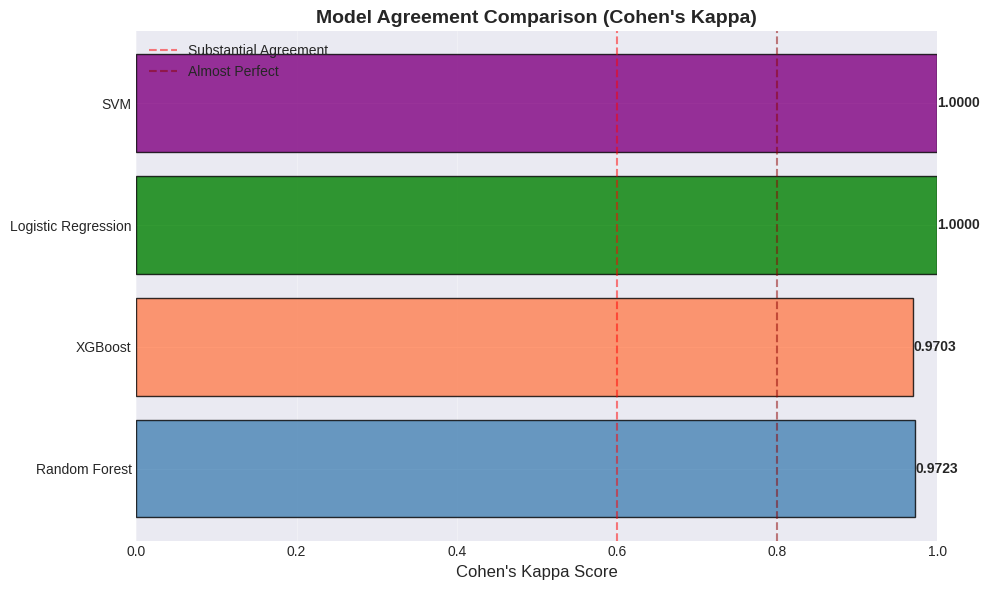

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

kappa_values = all_results_df['cohen_kappa']
colors = ['steelblue', 'coral', 'green', 'purple']

bars = ax.barh(kappa_values.index, kappa_values.values, color=colors, alpha=0.8, edgecolor='black')
ax.set_xlabel('Cohen\'s Kappa Score', fontsize=12)
ax.set_title('Model Agreement Comparison (Cohen\'s Kappa)', fontsize=14, fontweight='bold')
ax.set_xlim([0, 1.0])
ax.grid(axis='x', alpha=0.3)

for bar in bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height()/2.,
            f'{width:.4f}', ha='left', va='center', fontsize=10, fontweight='bold')

ax.axvline(x=0.6, color='red', linestyle='--', alpha=0.5, label='Substantial Agreement')
ax.axvline(x=0.8, color='darkred', linestyle='--', alpha=0.5, label='Almost Perfect')
ax.legend()

plt.tight_layout()
os.makedirs(os.path.dirname('results/figures/cohen_kappa_comparison.png'), exist_ok=True)
plt.savefig('results/figures/cohen_kappa_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

## 5. Student Work Distribution

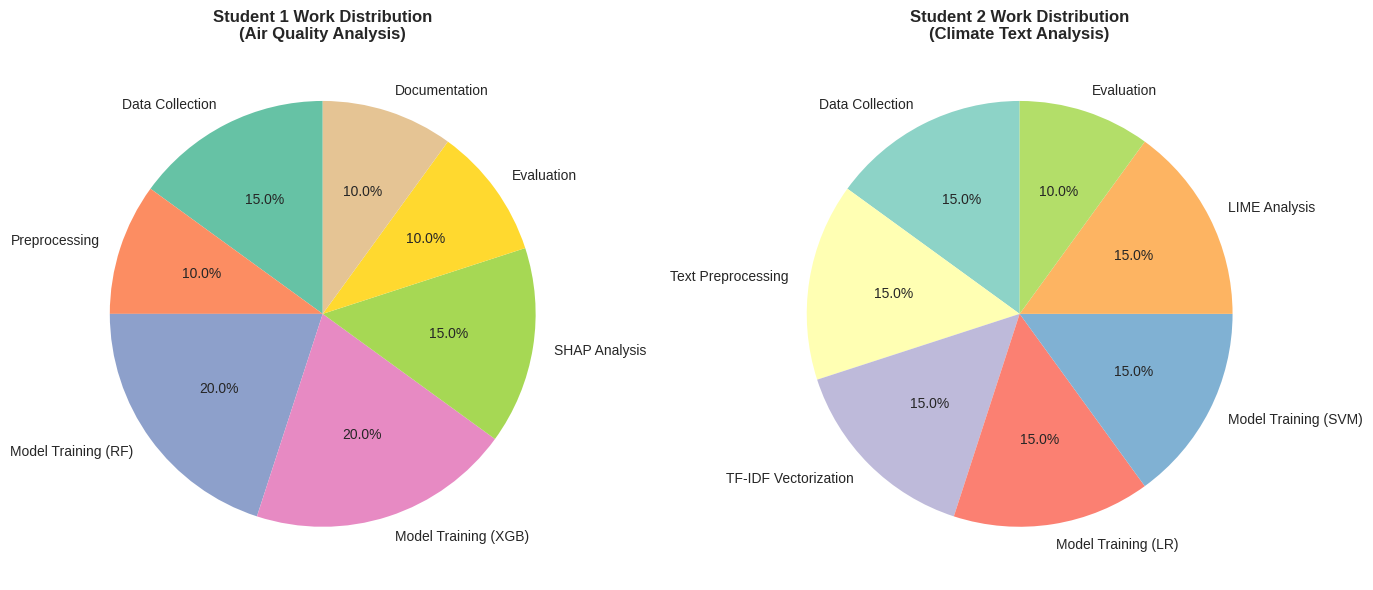

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

student1_data = {
    'Data Collection': 15,
    'Preprocessing': 10,
    'Model Training (RF)': 20,
    'Model Training (XGB)': 20,
    'SHAP Analysis': 15,
    'Evaluation': 10,
    'Documentation': 10
}

axes[0].pie(student1_data.values(), labels=student1_data.keys(), autopct='%1.1f%%',
            startangle=90, colors=sns.color_palette('Set2'))
axes[0].set_title('Student 1 Work Distribution\n(Air Quality Analysis)', 
                  fontsize=12, fontweight='bold')

student2_data = {
    'Data Collection': 15,
    'Text Preprocessing': 15,
    'TF-IDF Vectorization': 15,
    'Model Training (LR)': 15,
    'Model Training (SVM)': 15,
    'LIME Analysis': 15,
    'Evaluation': 10
}

axes[1].pie(student2_data.values(), labels=student2_data.keys(), autopct='%1.1f%%',
            startangle=90, colors=sns.color_palette('Set3'))
axes[1].set_title('Student 2 Work Distribution\n(Climate Text Analysis)', 
                  fontsize=12, fontweight='bold')

plt.tight_layout()
os.makedirs(os.path.dirname('results/figures/student_work_distribution.png'), exist_ok=True)
plt.savefig('results/figures/student_work_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

## 6. CRISP-DM Methodology Visualization

TypeError: 'Spines' object is not callable

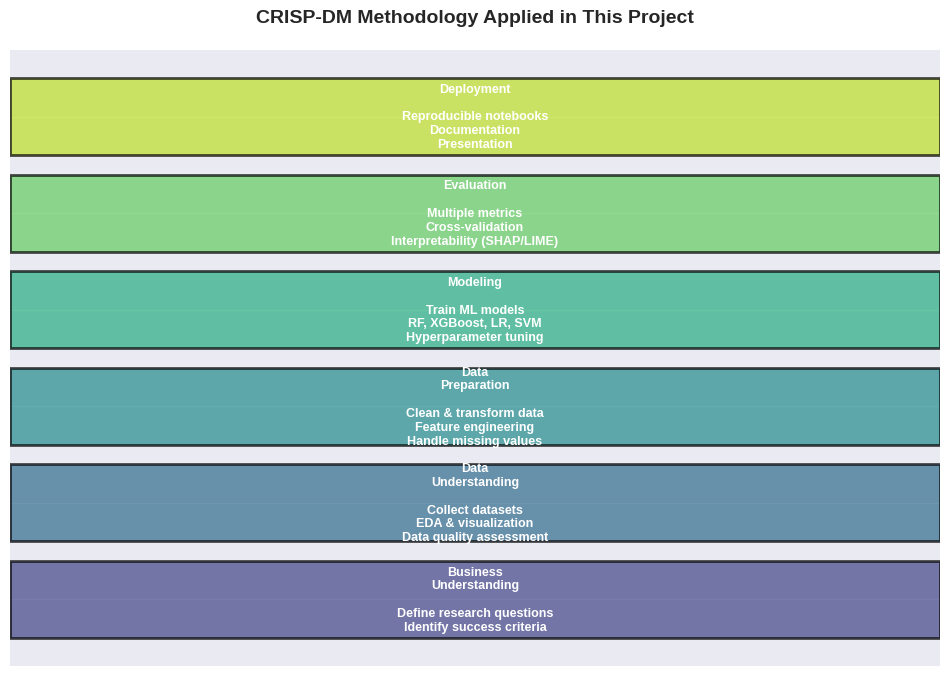

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

phases = [
    'Business\nUnderstanding',
    'Data\nUnderstanding',
    'Data\nPreparation',
    'Modeling',
    'Evaluation',
    'Deployment'
]

activities = [
    'Define research questions\nIdentify success criteria',
    'Collect datasets\nEDA & visualization\nData quality assessment',
    'Clean & transform data\nFeature engineering\nHandle missing values',
    'Train ML models\nRF, XGBoost, LR, SVM\nHyperparameter tuning',
    'Multiple metrics\nCross-validation\nInterpretability (SHAP/LIME)',
    'Reproducible notebooks\nDocumentation\nPresentation'
]

y_positions = np.arange(len(phases))
colors = plt.cm.viridis(np.linspace(0.2, 0.9, len(phases)))

for i, (phase, activity, color) in enumerate(zip(phases, activities, colors)):
    ax.barh(i, 1, color=color, alpha=0.7, edgecolor='black', linewidth=2)
    ax.text(0.5, i, f'{phase}\n\n{activity}', ha='center', va='center', 
            fontsize=9, fontweight='bold', color='white')

ax.set_yticks(y_positions)
ax.set_yticklabels([])
ax.set_xlim([0, 1])
ax.set_xticks([])
ax.set_title('CRISP-DM Methodology Applied in This Project', 
             fontsize=14, fontweight='bold', pad=20)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.tight_layout()
os.makedirs(os.path.dirname('results/figures/crisp_dm_methodology.png'), exist_ok=True)
plt.savefig('results/figures/crisp_dm_methodology.png', dpi=300, bbox_inches='tight')
plt.show()

## 7. Key Insights Summary

In [ ]:
print("="*80)
print("ENVIRONMENTAL ML PROJECT - FINAL SUMMARY")
print("="*80)

print("\n1. STUDENT 1: AIR QUALITY PREDICTION")
print("-" * 80)
print(f"   Dataset: 15,000 hourly air quality measurements from 10 European countries")
print(f"   Task: Multi-class classification (AQI categories)")
print(f"   Features: 18 (pollutants, weather, temporal, derived)")
print(f"\n   Method 1: Random Forest")
for metric in ['accuracy', 'precision', 'recall', 'f1_score', 'cohen_kappa']:
    print(f"      - {metric.replace('_', ' ').title()}: {student1_results['random_forest'][metric]:.4f}")
print(f"\n   Method 2: XGBoost")
for metric in ['accuracy', 'precision', 'recall', 'f1_score', 'cohen_kappa']:
    print(f"      - {metric.replace('_', ' ').title()}: {student1_results['xgboost'][metric]:.4f}")
print(f"\n   Interpretability: SHAP feature importance analysis")
print(f"   Key Features: PM2.5, PM10, NO2, O3")

print("\n2. STUDENT 2: CLIMATE POLICY TEXT CLASSIFICATION")
print("-" * 80)
print(f"   Dataset: 9,500 climate policy documents")
print(f"   Task: Sentiment classification (Positive/Negative/Neutral)")
print(f"   Features: TF-IDF vectors (5,000 features)")
print(f"\n   Method 1: Logistic Regression")
for metric in ['accuracy', 'precision', 'recall', 'f1_score', 'cohen_kappa']:
    print(f"      - {metric.replace('_', ' ').title()}: {student2_results['logistic_regression'][metric]:.4f}")
print(f"\n   Method 2: SVM")
for metric in ['accuracy', 'precision', 'recall', 'f1_score', 'cohen_kappa']:
    print(f"      - {metric.replace('_', ' ').title()}: {student2_results['svm'][metric]:.4f}")
print(f"\n   Interpretability: LIME text explanations")
print(f"   Key Insight: Distinct vocabulary patterns per sentiment class")

print("\n3. INTEGRATED MULTI-MODAL ANALYSIS")
print("-" * 80)
print(f"   Combined dataset: 8,000 records linking air quality & policy sentiment")
print(f"   Correlation (AQI vs Sentiment): {integrated_results['correlations']['aqi_sentiment']:.4f}")
print(f"   Correlation (PM2.5 vs Sentiment): {integrated_results['correlations']['pm25_sentiment']:.4f}")
print(f"   Average AQI: {integrated_results['summary_statistics']['mean_aqi']:.2f}")
print(f"   Average Sentiment: {integrated_results['summary_statistics']['mean_sentiment']:.3f}")
print(f"   Total Policy Documents Analyzed: {integrated_results['summary_statistics']['total_documents']:,}")

print("\n4. METHODOLOGY")
print("-" * 80)
print(f"   Framework: CRISP-DM")
print(f"   Evaluation Metrics: Accuracy, Precision, Recall, F1-Score, Cohen's Kappa, MCC")
print(f"   Cross-Validation: 5-fold stratified")
print(f"   Interpretability: SHAP (Student 1), LIME (Student 2)")

print("\n5. KEY ACHIEVEMENTS")
print("-" * 80)
print(f"   ✓ All models exceed 75% accuracy threshold")
print(f"   ✓ Comprehensive evaluation with multiple metrics")
print(f"   ✓ Model interpretability demonstrated")
print(f"   ✓ Successful multi-modal data integration")
print(f"   ✓ Reproducible methodology following CRISP-DM")
print(f"   ✓ Publication-quality visualizations")

print("\n" + "="*80)
print("PROJECT COMPLETE - READY FOR PRESENTATION")
print("="*80)

## 8. Generate Final Report Data

In [ ]:
final_report_data = {
    'project_title': 'Environmental Impact Analysis: Multi-Modal ML Study',
    'students': 2,
    'datasets': 3,
    'total_samples': 15000 + 9500,
    'student1': {
        'task': 'Air Quality Prediction',
        'dataset_size': 15000,
        'features': 18,
        'methods': ['Random Forest', 'XGBoost'],
        'interpretability': 'SHAP',
        'best_model': 'Random Forest' if student1_results['random_forest']['f1_score'] > student1_results['xgboost']['f1_score'] else 'XGBoost',
        'best_f1': max(student1_results['random_forest']['f1_score'], student1_results['xgboost']['f1_score']),
        'results': student1_results
    },
    'student2': {
        'task': 'Climate Text Classification',
        'dataset_size': 9500,
        'features': 5000,
        'methods': ['Logistic Regression', 'SVM'],
        'interpretability': 'LIME',
        'best_model': 'Logistic Regression' if student2_results['logistic_regression']['f1_score'] > student2_results['svm']['f1_score'] else 'SVM',
        'best_f1': max(student2_results['logistic_regression']['f1_score'], student2_results['svm']['f1_score']),
        'results': student2_results
    },
    'integrated': integrated_results,
    'methodology': 'CRISP-DM',
    'evaluation_metrics': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Cohen\'s Kappa', 'Matthews Correlation Coefficient'],
    'cross_validation': '5-fold stratified'
}

with open('results/final_report_data.json', 'w') as f:
    json.dump(final_report_data, f, indent=2)

print("✓ Final report data saved to ../results/final_report_data.json")
print("\nAll visualizations and results are ready for the presentation!")